In [4]:
from pymongo import MongoClient
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from IPython.parallel import Client

%matplotlib inline

In [5]:
ipclient = Client()
print (ipclient.ids)
#ipview = ipclient[:]
ipview = ipclient.load_balanced_view()

TimeoutError: Hub connection request timed out

In [8]:
client = MongoClient()
db = client.VentDyssynchrony_db
breath_data = db.BreathData_collection
patient_data = db.PatientData_collection
log_data = db.LogData_collection
vent_data = db.VentSettings_collection
RN_data = db.RNData_collection
RT_data = db.RTData_collection
Lab_data = db.LabData_collection


In [4]:
breath_data.find().count()

1089588

In [ ]:
results = breath_data.aggregate([{'$group': {
                            '_id':{'patient':'$patientID','vent_mode': '$vent_settings.vent_mode'},
                            'num_breath': {'$sum':1},
                            'avg_breath_time':{'$avg':'$characteristics.breath_time'},
                            'avg_peak_pressure':{'$avg':'$characteristics.peak_pressure'},
                            'max_peak_pressure':{'$max':'$characteristics.peak_pressure'},
                            'avg_vol':{'$avg': '$characteristics.max_vol'},
                            'max_vol':{'$max': '$characteristics.max_vol'}
                            }}])

summary = pd.DataFrame.from_dict(results['result'])


In [ ]:
summary['study_id'] = summary['_id'].apply(lambda x: x['patient'])
summary['vent_mode'] = summary['_id'].apply(lambda x: x['vent_mode'] if 'vent_mode' in x else 'unknown')
summary.drop(['_id'], inplace=True, axis=1)

In [ ]:
summary

In [ ]:
grouped = summary.groupby('vent_mode')
grouped.get_group('APVCMV')['num_breath'].sum()

In [9]:
breath_data.aggregate([{'$match': {'vent_settings.distance': {'$exists': 1}}},
                        {'$group': {
                            '_id':'$patientID', 
                            'avg':{'$avg':'$vent_settings.distance'},
                            'max':{'$max':'$vent_settings.distance'},
                            'min':{'$min':'$vent_settings.distance'}}}])

{'ok': 1.0,
 'result': [{'_id': 'P102',
   'avg': 647.0659661412726,
   'max': 2213.0,
   'min': -2.0},
  {'_id': 'P109', 'avg': 0.18470868681203112, 'max': 4.0, 'min': -3.0},
  {'_id': 'P101', 'avg': 0.1787847790507365, 'max': 3.0, 'min': -3.0},
  {'_id': 'P100', 'avg': 0.13215859030837004, 'max': 17.0, 'min': -15.0},
  {'_id': 'P116', 'avg': 0.12057683361761513, 'max': 1.0, 'min': -1884.0},
  {'_id': 'P115', 'avg': 0.1837366738798118, 'max': 3.0, 'min': -7.0},
  {'_id': 'P118', 'avg': 0.18149064314906432, 'max': 7.0, 'min': -4.0},
  {'_id': 'P110', 'avg': 0.17752954983653282, 'max': 4.0, 'min': -7.0},
  {'_id': 'P119', 'avg': 0.24133396749013794, 'max': 1801.0, 'min': -1798.0},
  {'_id': 'P112', 'avg': 0.16524500342444431, 'max': 3.0, 'min': -9.0},
  {'_id': 'P117', 'avg': 56.93931401714957, 'max': 5559.0, 'min': -15.0},
  {'_id': 'P103', 'avg': 0.1782814336878366, 'max': 28.0, 'min': -29.0},
  {'_id': 'P113', 'avg': 0.17800134644544693, 'max': 3.0, 'min': -7.0},
  {'_id': 'P106', 'a

In [10]:
breath_data.aggregate([{'$match': {'characteristics.breath_time': {'$lte': 1.5}}},
                        {'$group': {'_id': '$patientID','count': {'$sum':1}, 'avg':{'$avg':'$characteristics.breath_time'}}}])

{'ok': 1.0,
 'result': [{'_id': 'P104', 'avg': 1.2765405405405632, 'count': 222},
  {'_id': 'P109', 'avg': 1.212576068376092, 'count': 585},
  {'_id': 'P118', 'avg': 1.30076793056189, 'count': 2189},
  {'_id': 'P102', 'avg': 0.9740000000000025, 'count': 192},
  {'_id': 'P112', 'avg': 1.3664940312212939, 'count': 2178},
  {'_id': 'P119', 'avg': 1.2086826452503512, 'count': 7969},
  {'_id': 'P117', 'avg': 1.0564123102866827, 'count': 1186},
  {'_id': 'P120', 'avg': 1.3387902679396326, 'count': 6494},
  {'_id': 'P100', 'avg': 1.0337777777777084, 'count': 36},
  {'_id': 'P115', 'avg': 1.2263479729729565, 'count': 296},
  {'_id': 'P116', 'avg': 1.4094225696141007, 'count': 2047},
  {'_id': 'P110', 'avg': 1.177470451762635, 'count': 15517},
  {'_id': 'P113', 'avg': 1.2793202605949299, 'count': 15503},
  {'_id': 'P103', 'avg': 1.2145814977974807, 'count': 227},
  {'_id': 'P114', 'avg': 1.1416244710860568, 'count': 5672},
  {'_id': 'P105', 'avg': 1.3088113074204981, 'count': 1415},
  {'_id': '

In [11]:
breath_data.aggregate([{'$group': {'_id': '$patientID','count': {'$sum':1}, 'avg':{'$avg':'$characteristics.breath_time'}}}])

{'ok': 1.0,
 'result': [{'_id': 'P121', 'avg': 3.4429808084238713, 'count': 47104},
  {'_id': 'P120', 'avg': 2.4167774512932425, 'count': 78275},
  {'_id': 'P118', 'avg': 1.842847171434756, 'count': 18596},
  {'_id': 'P117', 'avg': 2.8878903152424047, 'count': 80002},
  {'_id': 'P100', 'avg': 84.89907048458144, 'count': 227},
  {'_id': 'P116', 'avg': 1.865612405024126, 'count': 32245},
  {'_id': 'P115', 'avg': 2.096564253240972, 'count': 50371},
  {'_id': 'P110', 'avg': 2.3814154022414193, 'count': 143148},
  {'_id': 'P107', 'avg': 1.887690072639221, 'count': 8260},
  {'_id': 'P103', 'avg': 3.2548086775845175, 'count': 36577},
  {'_id': 'P113', 'avg': 2.0909262412153824, 'count': 158937},
  {'_id': 'P106', 'avg': 2.595418447066753, 'count': 50176},
  {'_id': 'P108', 'avg': 1.8634267157393394, 'count': 4619},
  {'_id': 'P114', 'avg': 2.5148286154272195, 'count': 57794},
  {'_id': 'P105', 'avg': 2.5734633759109946, 'count': 41571},
  {'_id': 'P109', 'avg': 3.0761556825349055, 'count': 28

In [9]:
results = breath_data.find({'vent_settings.vent_mode':'APVCMV'}, 
                           {'_id':1, 'patientID':1, 'characteristics.breath_time':1, 'characteristics.insp_time':1, 'characteristics.exp_time':1})

In [10]:
breath = pd.DataFrame(list(results))

In [11]:
breath['breath_time'] = breath['characteristics'].apply(lambda x: x['breath_time'])
breath['insp_time'] = breath['characteristics'].apply(lambda x: x['insp_time'])
breath['exp_time'] = breath['characteristics'].apply(lambda x: x['exp_time'])

In [12]:
breath.describe()

,breath_time,insp_time,exp_time
count,921037.000000,921037.000000,921037.000000
mean,2.500746,0.878232,1.622514
std,17.761741,17.614915,2.275841
min,0.000000,0.000000,0.000000
25%,1.952000,0.704000,1.120000
50%,2.400000,0.832000,1.632000
75%,2.944000,0.992000,2.048000
max,16492.169000,16491.145000,1361.120000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000934DDA0>], dtype=object)

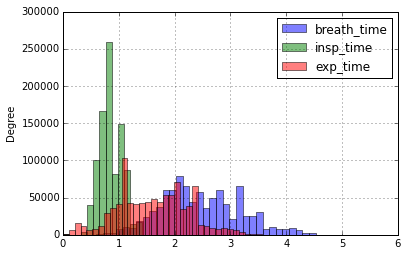

In [13]:
less_breath = breath[breath.breath_time < 6]
less_breath.breath_time.plot(kind='hist', bins = 50, alpha = 0.5, subplots=True, legend=True)
less_breath.insp_time.plot(kind='hist', bins = 50, alpha = 0.5, subplots=True, legend=True)
less_breath.exp_time.plot(kind='hist', bins = 50, alpha = 0.5, subplots=True, legend=True)

In [14]:
less_breath.describe()

,breath_time,insp_time,exp_time
count,920806.000000,920806.000000,920806.000000
mean,2.467198,0.852736,1.614462
std,0.707544,0.200273,0.636595
min,0.000000,0.000000,0.000000
25%,1.952000,0.704000,1.120000
50%,2.400000,0.832000,1.632000
75%,2.944000,0.992000,2.048000
max,5.961000,5.447000,5.248000


E:\Anaconda3\lib\site-packages\pandas\core\frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000973A320>], dtype=object)

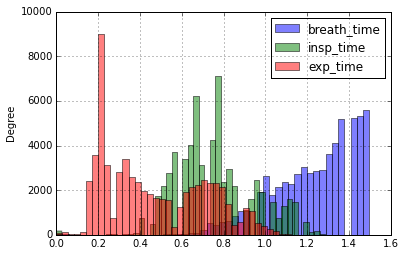

In [15]:
ds_breath = less_breath[breath.breath_time < 1.5]
ds_breath.breath_time.plot(kind='hist', bins = 50, alpha = 0.5, subplots=True, legend=True)
ds_breath.insp_time.plot(kind='hist', bins = 50, alpha = 0.5, subplots=True, legend=True)
ds_breath.exp_time.plot(kind='hist', bins = 50, alpha = 0.5, subplots=True, legend=True)

In [16]:
ds_breath.describe()

,breath_time,insp_time,exp_time
count,62274.000000,62274.000000,62274.000000
mean,1.228252,0.756032,0.472220
std,0.201636,0.189700,0.242642
min,0.000000,0.000000,0.000000
25%,1.088000,0.640000,0.256000
50%,1.280000,0.736000,0.416000
75%,1.408000,0.864000,0.672000
max,1.497000,1.312000,1.440000


E:\Anaconda3\lib\site-packages\pandas\tools\plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


OrderedDict([(False, {'whiskers': [<matplotlib.lines.Line2D object at 0x00000000490BA828>, <matplotlib.lines.Line2D object at 0x00000000490ADAC8>, <matplotlib.lines.Line2D object at 0x0000000048C86F28>, <matplotlib.lines.Line2D object at 0x0000000048DC5978>, <matplotlib.lines.Line2D object at 0x00000000490FA278>, <matplotlib.lines.Line2D object at 0x00000000490FF208>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000000490C0C88>, <matplotlib.lines.Line2D object at 0x0000000048C99588>, <matplotlib.lines.Line2D object at 0x00000000490F3358>], 'medians': [<matplotlib.lines.Line2D object at 0x0000000049027AC8>, <matplotlib.lines.Line2D object at 0x00000000490E7438>, <matplotlib.lines.Line2D object at 0x00000000491130B8>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000000048D006D8>, <matplotlib.lines.Line2D object at 0x00000000490EC3C8>, <matplotlib.lines.Line2D object at 0x0000000049119048>], 'means': [], 'caps': [<matplotlib.lines.Line2D object at 0x00000000490487B8>, <matplotli

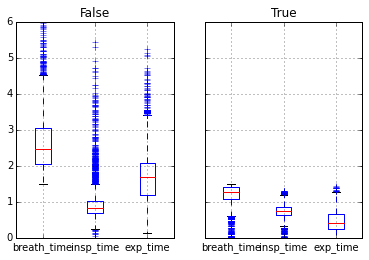

In [17]:
gp_breath = less_breath.groupby(breath.breath_time <1.5)
gp_breath.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x493090b8>,
 'caps': [<matplotlib.lines.Line2D at 0x493167b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x49329668>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x493236d8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x493097b8>,
  <matplotlib.lines.Line2D at 0x49369048>]}

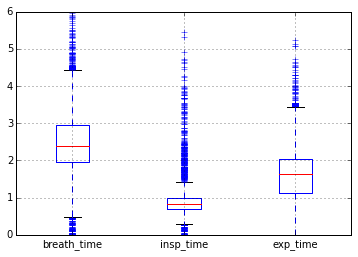

In [18]:
less_breath.boxplot()

In [19]:
gp_breath.describe()

breath_time      insp_time       exp_time
breath_time                                                   
False       count  858532.000000  858532.000000  858532.000000
            mean        2.557066       0.859751       1.697315
            std         0.643867       0.199200       0.573477
            min         1.504000       0.000000       0.128000
            25%         2.048000       0.704000       1.184000
            50%         2.464000       0.832000       1.696000
            75%         3.040000       1.024000       2.080000
            max         5.961000       5.447000       5.248000
True        count   62274.000000   62274.000000   62274.000000
            mean        1.228252       0.756032       0.472220
            std         0.201636       0.189700       0.242642
            min         0.000000       0.000000       0.000000
            25%         1.088000       0.640000       0.256000
            50%         1.280000       0.736000       0.416000
            75%         1.408000       0.864000       0.672000
            max         1.497000       1.312000       1.440000

OrderedDict([(False, {'whiskers': [<matplotlib.lines.Line2D object at 0x00000000495464A8>, <matplotlib.lines.Line2D object at 0x000000004953AE48>, <matplotlib.lines.Line2D object at 0x00000000493FB2E8>, <matplotlib.lines.Line2D object at 0x00000000493EE198>, <matplotlib.lines.Line2D object at 0x000000004A55CF28>, <matplotlib.lines.Line2D object at 0x000000004A563EB8>], 'boxes': [<matplotlib.lines.Line2D object at 0x000000004954DF28>, <matplotlib.lines.Line2D object at 0x0000000049415668>, <matplotlib.lines.Line2D object at 0x000000004A555CF8>], 'medians': [<matplotlib.lines.Line2D object at 0x00000000494A1358>, <matplotlib.lines.Line2D object at 0x000000004A550128>, <matplotlib.lines.Line2D object at 0x000000004A576D68>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000000048C7F198>, <matplotlib.lines.Line2D object at 0x000000004A5550B8>, <matplotlib.lines.Line2D object at 0x000000004A57CCF8>], 'means': [], 'caps': [<matplotlib.lines.Line2D object at 0x00000000494D3EB8>, <matplotli

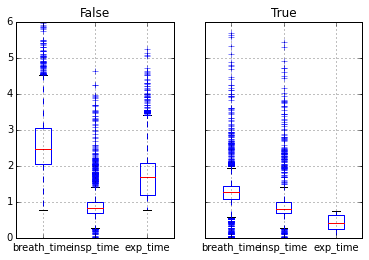

In [20]:
gp_breath = less_breath.groupby(less_breath.exp_time < 0.75)
gp_breath.boxplot()